In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

In [2]:
#colors = ('#313695','#4575b4','#74add1','#abd9e9','#e0f3f8','#ffffbf','#fee090','#fdae61','#f46d43','#d73027','#a50026')

#levels =  np.arange(0,12)

names = [10,11]
names1=[r'tauC $_{E391-S400}$',r'tauC $_{A390-S400}$',r'tauC mut-$_{A390-S400}$']
pmf = [np.loadtxt('./pmf_beta_cl_{}.txt'.format(i)) for i in names]
pmf.append(np.loadtxt('pmf_beta_cl_mu11.txt'))
pmf = [x-x[0,0] for x in pmf]
pmf = [x-x.min() for x in pmf]
pmf = [np.vstack((np.ones(len(x[0]))*50,x)) for x in pmf]
pmf = [np.hstack((np.ones((len(x),1))*50,x)) for x in pmf]

In [ ]:
'''fig,axes = plt.subplots(figsize=(20,6),nrows=1,ncols=3)
axes = axes.flatten()
font_title = 24
font_label = 22
font_tick = 20
for i in range(3):
    #heatmap = axes[i].contourf(pmf[i],extent=[0,17,-10,100],cmap='jet',levels=np.arange(15))
    heatmap = axes[i].contourf(pmf[i],cmap='jet',levels=np.arange(15))
    #axes[i].set_title(names1[i],fontsize=font_title,family='Arial')
    axes[i].set_xticks(np.arange(0,17,2))
    axes[i].set_xticklabels(np.arange(0,17,2),family='Arial')
    if i == 0:
       axes[i].set_yticks(np.arange(0,11)+0.5) 
       axes[i].set_yticklabels(np.arange(0,11)*10,family='Arial') 
    else:
        axes[i].set_yticks(np.arange(0,12)+0.5*10/11)
        axes[i].set_yticklabels(['%.1f'%x for x in np.arange(0,12)*100/11],family='Arial')
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].tick_params(axis='both',labelsize=font_tick)
    #axes[i].set_xlabel(r'$n_{cluster}$',fontsize=font_label,family='Arial')
#axes[0].set_ylabel('β sheet content (%)',fontsize=font_label,family='Arial')
cb = plt.colorbar(heatmap,ax=axes[i],fraction=0.1,shrink=0.7)
#cb.set_label(r'$k_{B}T$',fontsize=font_label,family='Arial')
cb.ax.tick_params(labelsize=font_tick)'''

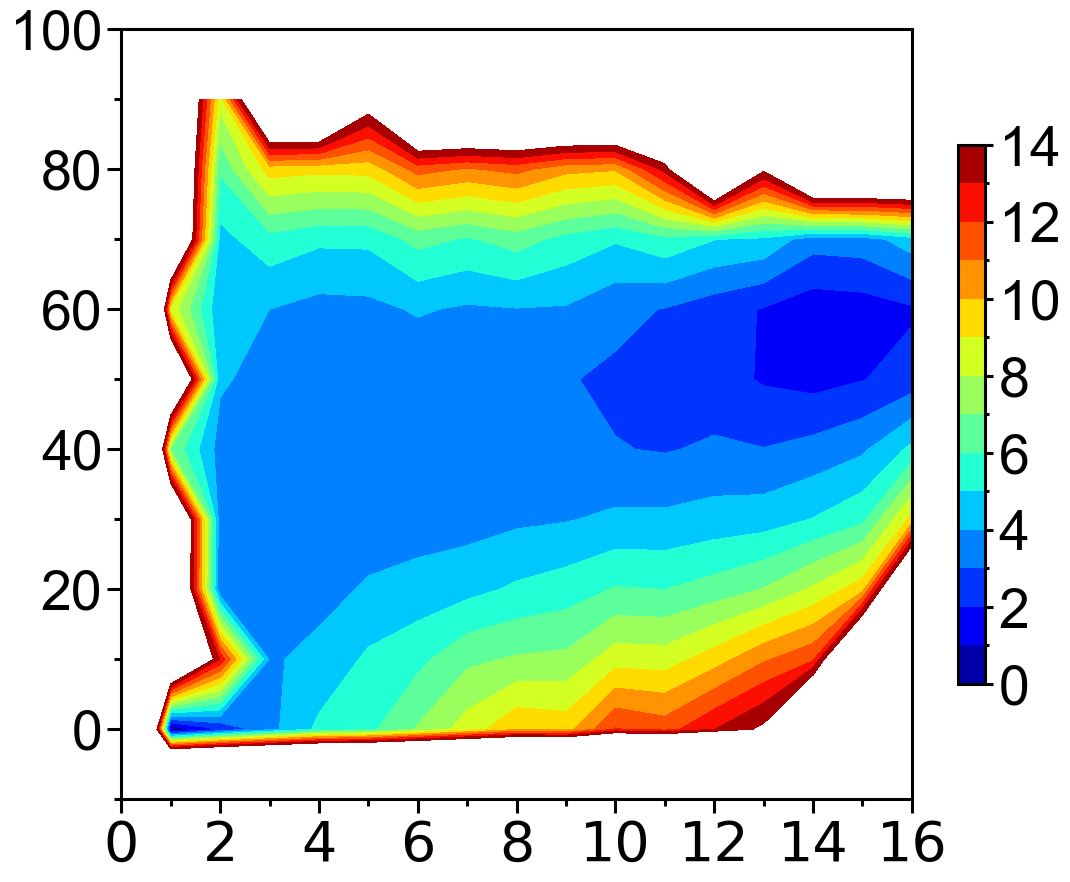

In [48]:
font_tick = 40
axes_width = 2.2
tick_length = 10
fontstyle='Arial'
plt.figure(figsize=(12,10))
i=0
names = ['tauC10','tauC11','mutauC11']
heatmap = plt.contourf(pmf[i],cmap='jet',levels=np.arange(15))
plt.xticks(np.arange(0,17,2))
if i == 0:
    plt.yticks(np.arange(0,11,2)+1,np.arange(0,11,2)*10,family=fontstyle)
else:
    plt.yticks([11*x/10+1 for x in range(0,12,2)],[x*10 for x in range(0,12,2)],family=fontstyle)

#plt.gca().spines['right'].set_visible(False)
#plt.gca().spines['top'].set_visible(False)
#Increase thickness of axes
plt.gca().spines['top'].set_linewidth(axes_width)
plt.gca().spines['right'].set_linewidth(axes_width)
plt.gca().spines['bottom'].set_linewidth(axes_width)
plt.gca().spines['left'].set_linewidth(axes_width)
#add  minor ticks
plt.gca().xaxis.set_minor_locator(AutoMinorLocator(2))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(2))
#control ticks
plt.tick_params(axis='both',labelsize=font_tick,width=axes_width,length=tick_length)
plt.gca().xaxis.set_tick_params(which='minor', width=axes_width, length=tick_length/2)
plt.gca().yaxis.set_tick_params(which='minor', width=axes_width, length=tick_length/2)

cb = plt.colorbar(heatmap,fraction=0.1,shrink=0.7)
cb.ax.tick_params(labelsize=font_tick,width=axes_width,length=tick_length-4)
cb.outline.set_linewidth(axes_width)
cb.ax.yaxis.set_minor_locator(AutoMinorLocator(2))
cb.ax.yaxis.set_tick_params(which='minor', width=axes_width, length=(tick_length-4)/2)
for label in cb.ax.get_yticklabels():
    label.set_family(fontstyle)
plt.savefig(f'./figures/pmf_{names[i]}.png',dpi=220,transparent=True)